# Linear Regression

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('../data/weight-height.csv')

In [4]:
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


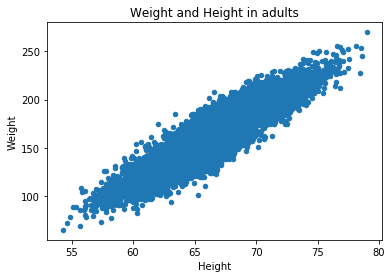

In [5]:
df.plot(kind='scatter',
        x='Height',
        y='Weight',
        title='Weight and Height in adults')

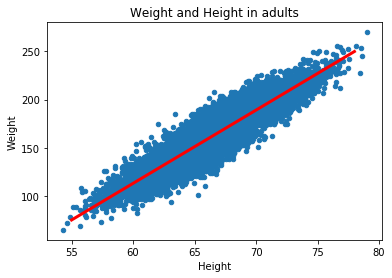

In [6]:
df.plot(kind='scatter',
        x='Height',
        y='Weight',
        title='Weight and Height in adults')

# Here we're plotting the red line 'by hand' with fixed values
# We'll try to learn this line with an algorithm below
plt.plot([55, 78], [75, 250], color='red', linewidth=3)

In [7]:
def line(x, w=0, b=0):
    return x * w + b

In [8]:
x = np.linspace(55, 80, 100)

In [9]:
x

array([55.        , 55.25252525, 55.50505051, 55.75757576, 56.01010101,
       56.26262626, 56.51515152, 56.76767677, 57.02020202, 57.27272727,
       57.52525253, 57.77777778, 58.03030303, 58.28282828, 58.53535354,
       58.78787879, 59.04040404, 59.29292929, 59.54545455, 59.7979798 ,
       60.05050505, 60.3030303 , 60.55555556, 60.80808081, 61.06060606,
       61.31313131, 61.56565657, 61.81818182, 62.07070707, 62.32323232,
       62.57575758, 62.82828283, 63.08080808, 63.33333333, 63.58585859,
       63.83838384, 64.09090909, 64.34343434, 64.5959596 , 64.84848485,
       65.1010101 , 65.35353535, 65.60606061, 65.85858586, 66.11111111,
       66.36363636, 66.61616162, 66.86868687, 67.12121212, 67.37373737,
       67.62626263, 67.87878788, 68.13131313, 68.38383838, 68.63636364,
       68.88888889, 69.14141414, 69.39393939, 69.64646465, 69.8989899 ,
       70.15151515, 70.4040404 , 70.65656566, 70.90909091, 71.16161616,
       71.41414141, 71.66666667, 71.91919192, 72.17171717, 72.42

In [10]:
yhat = line(x, w=0, b=0)

In [11]:
yhat

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

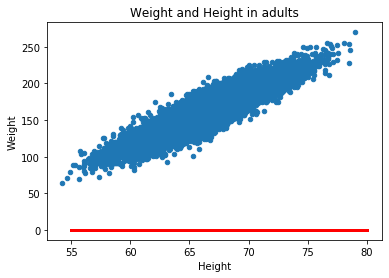

In [12]:
df.plot(kind='scatter',
        x='Height',
        y='Weight',
        title='Weight and Height in adults')
plt.plot(x, yhat, color='red', linewidth=3)

### Cost Function

In [13]:
def mean_squared_error(y_true, y_pred):
    s = (y_true - y_pred)**2
    return s.mean()

In [14]:
X = df[['Height']].values
y_true = df['Weight'].values

In [15]:
y_true

array([241.89356318, 162.31047252, 212.74085556, ..., 128.47531878,
       163.85246135, 113.64910268])

In [16]:
y_pred = line(X)

In [17]:
y_pred

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]])

In [18]:
mean_squared_error(y_true, y_pred.ravel())

27093.83757456157

### you do it!

Try changing the values of the parameters b and w in the line above and plot it again to see how the plot and the cost  change.

Text(0.5, 0, 'b')

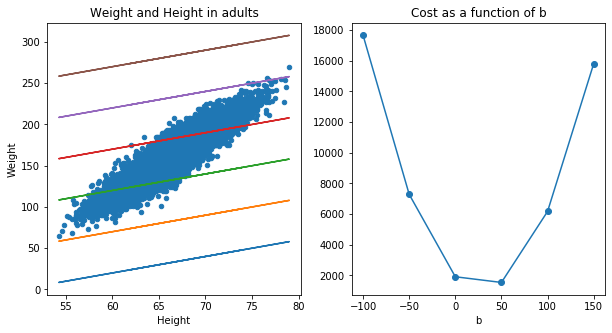

In [19]:
plt.figure(figsize=(10, 5))

# we are going to draw 2 plots in the same figure
# first plot, data and a few lines
ax1 = plt.subplot(121)
df.plot(kind='scatter',
        x='Height',
        y='Weight',
        title='Weight and Height in adults', ax=ax1)

# let's explore the cost function for a few values of b between -100 and +150
bbs = np.array([-100, -50, 0, 50, 100, 150])
mses = []  # we will append the values of the cost here, for each line
for b in bbs:
    y_pred = line(X, w=2, b=b)
    mse = mean_squared_error(y_true, y_pred)
    mses.append(mse)
    plt.plot(X, y_pred)

# second plot: Cost function
ax2 = plt.subplot(122)
plt.plot(bbs, mses, 'o-')
plt.title('Cost as a function of b')
plt.xlabel('b')

## Linear Regression with Keras

In [20]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam, SGD

Using TensorFlow backend.


In [21]:
model = Sequential()

In [22]:
model.add(Dense(1, input_shape=(1,)))

Instructions for updating:
Colocations handled automatically by placer.


In [23]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [24]:
model.compile(Adam(lr=0.5), 'mean_squared_error')

In [25]:
model.fit(X, y_true, epochs=40)

Instructions for updating:
Use tf.cast instead.
Epoch 1/40
10000/10000 [==============================] - 1s 81us/step - loss: 1769.4001 0s - loss: 1854.12
Epoch 2/40
10000/10000 [==============================] - 0s 37us/step - loss: 564.3775
Epoch 3/40
10000/10000 [==============================] - 0s 34us/step - loss: 552.6730
Epoch 4/40
10000/10000 [==============================] - 0s 33us/step - loss: 526.8985
Epoch 5/40
10000/10000 [==============================] - 0s 44us/step - loss: 505.9995
Epoch 6/40
10000/10000 [==============================] - 0s 42us/step - loss: 477.0358
Epoch 7/40
10000/10000 [==============================] - 0s 41us/step - loss: 446.8431
Epoch 8/40
10000/10000 [==============================] - 0s 43us/step - loss: 419.7401
Epoch 9/40
10000/10000 [==============================] - 0s 41us/step - loss: 387.3070
Epoch 10/40
10000/10000 [==============================] - 0s 37us/step - loss: 361.3706
Epoch 11/40
10000/10000 [==========================

In [26]:
y_pred = model.predict(X)

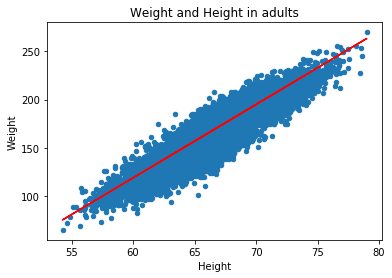

In [27]:
df.plot(kind='scatter',
        x='Height',
        y='Weight',
        title='Weight and Height in adults')
plt.plot(X, y_pred, color='red')

In [28]:
W, B = model.get_weights()

In [29]:
W

array([[7.617545]], dtype=float32)

In [30]:
B

array([-338.2747], dtype=float32)

## Evaluating Model Performance

In [31]:
from sklearn.metrics import r2_score

In [32]:
print("The R2 score is {:0.3f}".format(r2_score(y_true, y_pred)))

The R2 score is 0.822


### Train Test Split

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y_true,
                                                    test_size=0.2)

In [35]:
len(X_train)

8000

In [36]:
len(X_test)

2000

In [37]:
W[0, 0] = 0.0
B[0] = 0.0
model.set_weights((W, B))

In [38]:
model.fit(X_train, y_train, epochs=50, verbose=0)

In [39]:
y_train_pred = model.predict(X_train).ravel()
y_test_pred = model.predict(X_test).ravel()

In [40]:
from sklearn.metrics import mean_squared_error as mse

In [41]:
print("The Mean Squared Error on the Train set is:\t{:0.1f}".format(mse(y_train, y_train_pred)))
print("The Mean Squared Error on the Test set is:\t{:0.1f}".format(mse(y_test, y_test_pred)))

The Mean Squared Error on the Train set is:	149.3
The Mean Squared Error on the Test set is:	162.0


In [42]:
print("The R2 score on the Train set is:\t{:0.3f}".format(r2_score(y_train, y_train_pred)))
print("The R2 score on the Test set is:\t{:0.3f}".format(r2_score(y_test, y_test_pred)))

The R2 score on the Train set is:	0.854
The R2 score on the Test set is:	0.847


# Classification

In [43]:
df = pd.read_csv('../data/user_visit_duration.csv')

In [44]:
df.head()

,Time (min),Buy
0,2.000000,0
1,0.683333,0
2,3.216667,1
3,0.900000,0
4,1.533333,1


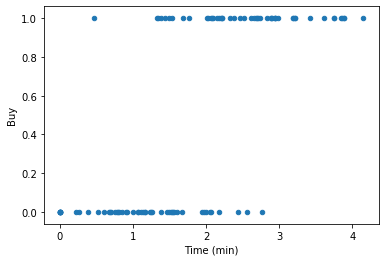

In [45]:
df.plot(kind='scatter', x='Time (min)', y='Buy')

In [46]:
model = Sequential()
model.add(Dense(1, input_shape=(1,), activation='sigmoid'))

In [47]:
model.compile(SGD(lr=0.5), 'binary_crossentropy', metrics=['accuracy'])

In [48]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [49]:
X = df[['Time (min)']].values
y = df['Buy'].values

model.fit(X, y, epochs=25)

Epoch 1/25
100/100 [==============================] - 0s 5ms/step - loss: 0.8411 - acc: 0.5800
Epoch 2/25
100/100 [==============================] - 0s 73us/step - loss: 0.5246 - acc: 0.7700
Epoch 3/25
100/100 [==============================] - 0s 77us/step - loss: 0.5057 - acc: 0.7900
Epoch 4/25
100/100 [==============================] - 0s 75us/step - loss: 0.5228 - acc: 0.7600
Epoch 5/25
100/100 [==============================] - 0s 88us/step - loss: 0.4835 - acc: 0.8000
Epoch 6/25
100/100 [==============================] - 0s 98us/step - loss: 0.4810 - acc: 0.8100
Epoch 7/25
100/100 [==============================] - 0s 85us/step - loss: 0.4648 - acc: 0.7800
Epoch 8/25
100/100 [==============================] - 0s 84us/step - loss: 0.4580 - acc: 0.7900
Epoch 9/25
100/100 [==============================] - 0s 94us/step - loss: 0.4474 - acc: 0.8300
Epoch 10/25
100/100 [==============================] - 0s 110us/step - loss: 0.4391 - acc: 0.8200
Epoch 11/25
100/100 [==================

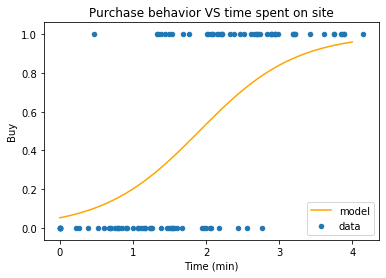

In [50]:
ax = df.plot(kind='scatter', x='Time (min)', y='Buy',
             title='Purchase behavior VS time spent on site')

temp = np.linspace(0, 4)
ax.plot(temp, model.predict(temp), color='orange')
plt.legend(['model', 'data'])

In [51]:
temp_class = model.predict(temp) > 0.5

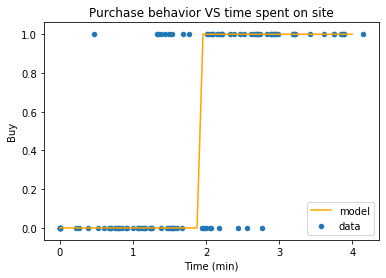

In [52]:
ax = df.plot(kind='scatter', x='Time (min)', y='Buy',
             title='Purchase behavior VS time spent on site')

temp = np.linspace(0, 4)
ax.plot(temp, temp_class, color='orange')
plt.legend(['model', 'data'])

In [53]:
y_pred = model.predict(X)
y_class_pred = y_pred > 0.5

In [54]:
from sklearn.metrics import accuracy_score

In [55]:
print("The accuracy score is {:0.3f}".format(accuracy_score(y, y_class_pred)))

The accuracy score is 0.820


### Train/Test split


In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [57]:
params = model.get_weights()
params = [np.zeros(w.shape) for w in params]
model.set_weights(params)

In [58]:
print("The accuracy score is {:0.3f}".format(accuracy_score(y, model.predict(X) > 0.5)))

The accuracy score is 0.500


In [59]:
model.fit(X_train, y_train, epochs=25, verbose=0)

In [60]:
print("The train accuracy score is {:0.3f}".format(accuracy_score(y_train, model.predict(X_train) > 0.5)))
print("The test accuracy score is {:0.3f}".format(accuracy_score(y_test, model.predict(X_test) > 0.5)))

The train accuracy score is 0.825
The test accuracy score is 0.800


## Cross Validation

In [61]:
from keras.wrappers.scikit_learn import KerasClassifier

In [62]:
def build_logistic_regression_model():
    model = Sequential()
    model.add(Dense(1, input_shape=(1,), activation='sigmoid'))
    model.compile(SGD(lr=0.5),
                  'binary_crossentropy',
                  metrics=['accuracy'])
    return model

In [63]:
model = KerasClassifier(build_fn=build_logistic_regression_model,
                        epochs=25,
                        verbose=0)

In [64]:
from sklearn.model_selection import cross_val_score, KFold

In [65]:
cv = KFold(3, shuffle=True)

In [66]:
scores = cross_val_score(model, X, y, cv=cv)

In [67]:
scores

array([0.76470588, 0.87878788, 0.75757576])

In [68]:
print("The cross validation accuracy is {:0.4f} ± {:0.4f}".format(scores.mean(), scores.std()))

The cross validation accuracy is 0.8004 ± 0.0555


## Confusion Matrix

In [69]:
from sklearn.metrics import confusion_matrix

In [70]:
confusion_matrix(y, y_class_pred)

array([[41,  9],
       [ 9, 41]])

In [71]:
def pretty_confusion_matrix(y_true, y_pred, labels=["False", "True"]):
    cm = confusion_matrix(y_true, y_pred)
    pred_labels = ['Predicted '+ l for l in labels]
    df = pd.DataFrame(cm, index=labels, columns=pred_labels)
    return df

In [72]:
pretty_confusion_matrix(y, y_class_pred, ['Not Buy', 'Buy'])

,Predicted Not Buy,Predicted Buy
Not Buy,41,9
Buy,9,41


In [73]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [74]:
print("Precision:\t{:0.3f}".format(precision_score(y, y_class_pred)))
print("Recall:  \t{:0.3f}".format(recall_score(y, y_class_pred)))
print("F1 Score:\t{:0.3f}".format(f1_score(y, y_class_pred)))

Precision:	0.820
Recall:  	0.820
F1 Score:	0.820


In [75]:
from sklearn.metrics import classification_report

In [76]:
print(classification_report(y, y_class_pred))

              precision    recall  f1-score   support

           0       0.82      0.82      0.82        50
           1       0.82      0.82      0.82        50

    accuracy                           0.82       100
   macro avg       0.82      0.82      0.82       100
weighted avg       0.82      0.82      0.82       100



## Feature Preprocessing

### Categorical Features

In [77]:
df = pd.read_csv('../data/weight-height.csv')
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [78]:
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [79]:
pd.get_dummies(df['Gender'], prefix='Gender').head()

,Gender_Female,Gender_Male
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


## Feature Transformations

#### 1) Rescale with fixed factor

In [80]:
df['Height (feet)'] = df['Height']/12.0
df['Weight (100 lbs)'] = df['Weight']/100.0

In [81]:
df.describe().round(2)

,Height,Weight,Height (feet),Weight (100 lbs)
count,10000.00,10000.00,10000.00,10000.00
mean,66.37,161.44,5.53,1.61
std,3.85,32.11,0.32,0.32
min,54.26,64.70,4.52,0.65
25%,63.51,135.82,5.29,1.36
50%,66.32,161.21,5.53,1.61
75%,69.17,187.17,5.76,1.87
max,79.00,269.99,6.58,2.70


#### MinMax normalization

In [82]:
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()
df['Weight_mms'] = mms.fit_transform(df[['Weight']])
df['Height_mms'] = mms.fit_transform(df[['Height']])
df.describe().round(2)

,Height,Weight,Height (feet),Weight (100 lbs),Weight_mms,Height_mms
count,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00
mean,66.37,161.44,5.53,1.61,0.47,0.49
std,3.85,32.11,0.32,0.32,0.16,0.16
min,54.26,64.70,4.52,0.65,0.00,0.00
25%,63.51,135.82,5.29,1.36,0.35,0.37
50%,66.32,161.21,5.53,1.61,0.47,0.49
75%,69.17,187.17,5.76,1.87,0.60,0.60
max,79.00,269.99,6.58,2.70,1.00,1.00


#### 3) Standard normalization

In [83]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
df['Weight_ss'] = ss.fit_transform(df[['Weight']])
df['Height_ss'] = ss.fit_transform(df[['Height']])
df.describe().round(2)

,Height,Weight,Height (feet),Weight (100 lbs),Weight_mms,Height_mms,Weight_ss,Height_ss
count,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00
mean,66.37,161.44,5.53,1.61,0.47,0.49,0.00,0.00
std,3.85,32.11,0.32,0.32,0.16,0.16,1.00,1.00
min,54.26,64.70,4.52,0.65,0.00,0.00,-3.01,-3.15
25%,63.51,135.82,5.29,1.36,0.35,0.37,-0.80,-0.74
50%,66.32,161.21,5.53,1.61,0.47,0.49,-0.01,-0.01
75%,69.17,187.17,5.76,1.87,0.60,0.60,0.80,0.73
max,79.00,269.99,6.58,2.70,1.00,1.00,3.38,3.28


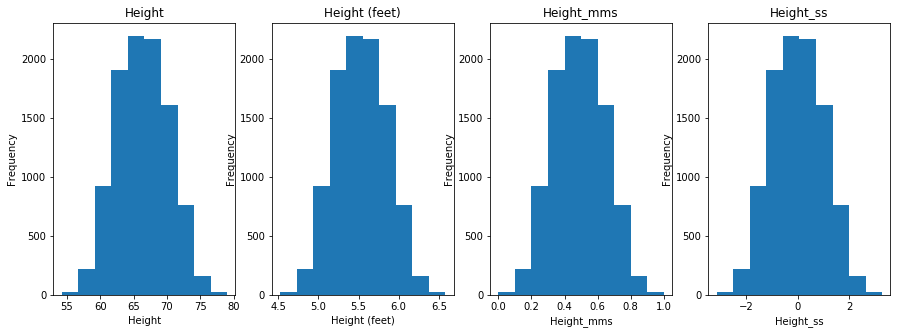

In [84]:
plt.figure(figsize=(15, 5))

for i, feature in enumerate(['Height', 'Height (feet)', 'Height_mms', 'Height_ss']):
    plt.subplot(1, 4, i+1)
    df[feature].plot(kind='hist', title=feature)
    plt.xlabel(feature)

# Machine Learning Exercises

## Exercise 1

You've just been hired at a real estate investment firm and they would like you to build a model for pricing houses. You are given a dataset that contains data for house prices and a few features like number of bedrooms, size in square feet and age of the house. Let's see if you can build a model that is able to predict the price. In this exercise we extend what we have learned about linear regression to a dataset with more than one feature. Here are the steps to complete it:

1. Load the dataset ../data/housing-data.csv
- plot the histograms for each feature
- create 2 variables called X and y: X shall be a matrix with 3 columns (sqft,bdrms,age) and y shall be a vector with 1 column (price)
- create a linear regression model in Keras with the appropriate number of inputs and output
- split the data into train and test with a 20% test size
- train the model on the training set and check its accuracy on training and test set
- how's your model doing? Is the loss growing smaller?
- try to improve your model with these experiments:
    - normalize the input features with one of the rescaling techniques mentioned above
    - use a different value for the learning rate of your model
    - use a different optimizer
- once you're satisfied with training, check the R2score on the test set

In [85]:
df1 = pd.read_csv('../data/housing-data.csv')

In [86]:
df1.head()

,sqft,bdrms,age,price
0,2104,3,70,399900
1,1600,3,28,329900
2,2400,3,44,369000
3,1416,2,49,232000
4,3000,4,75,539900


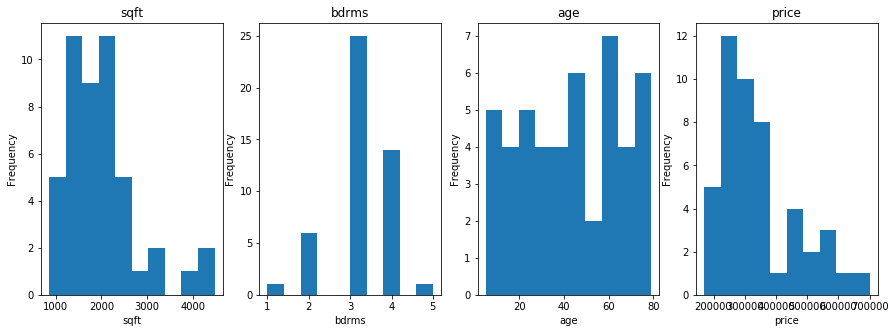

In [87]:
plt.figure(figsize=(15, 5))

for i, feature in enumerate(['sqft', 'bdrms', 'age', 'price']):
    plt.subplot(1, 4, i+1)
    df1[feature].plot(kind='hist', title=feature)
    plt.xlabel(feature)

In [88]:
df1['sqft_mm'] = mms.fit_transform(df1[['sqft']])
df1['bdrms_mm'] = mms.fit_transform(df1[['bdrms']])
df1['age_mm'] = mms.fit_transform(df1[['age']])
df1['price_mm'] = mms.fit_transform(df1[['price']])
df1['sqft1000'] = df1['sqft']/5000.0
df1['bdrms5'] = df1['bdrms']/5.0
df1['age10'] = df1['age']/80.0
df1['price100k'] = df1['price']/7e5
df1.describe().round(2)

,sqft,bdrms,age,price,sqft_mm,bdrms_mm,age_mm,price_mm,sqft1000,bdrms5,age10,price100k
count,47.00,47.00,47.00,47.00,47.00,47.00,47.00,47.00,47.00,47.00,47.00,47.00
mean,2000.68,3.17,42.74,340412.66,0.32,0.54,0.51,0.32,0.40,0.63,0.53,0.49
std,794.70,0.76,22.87,125039.90,0.22,0.19,0.31,0.24,0.16,0.15,0.29,0.18
min,852.00,1.00,5.00,169900.00,0.00,0.00,0.00,0.00,0.17,0.20,0.06,0.24
25%,1432.00,3.00,24.50,249900.00,0.16,0.50,0.26,0.15,0.29,0.60,0.31,0.36
50%,1888.00,3.00,44.00,299900.00,0.29,0.50,0.53,0.25,0.38,0.60,0.55,0.43
75%,2269.00,4.00,61.50,384450.00,0.39,0.75,0.76,0.40,0.45,0.80,0.77,0.55
max,4478.00,5.00,79.00,699900.00,1.00,1.00,1.00,1.00,0.90,1.00,0.99,1.00


In [89]:
X = df1[['sqft1000','bdrms','age10']]
# X = df1[['sqft_mm','bdrms_mm','age_mm']]
X.head()

,sqft1000,bdrms,age10
0,0.4208,3,0.8750
1,0.3200,3,0.3500
2,0.4800,3,0.5500
3,0.2832,2,0.6125
4,0.6000,4,0.9375


In [90]:
X = X.values

In [91]:
y_true = df1['price100k']
# y_true = df1['price_mm']
y_true.head()

0    0.571286
1    0.471286
2    0.527143
3    0.331429
4    0.771286
Name: price100k, dtype: float64

In [92]:
y_true = y_true.values

In [93]:
X_train, X_test, y_train, y_test = train_test_split(X, y_true, test_size=0.2)

In [94]:
model1 = Sequential()

In [95]:
model1.add(Dense(1, input_shape=(3,)))
model1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 1)                 4         
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________


In [96]:
model1.compile(Adam(lr=0.8), 'mean_squared_error')

In [97]:
model1.fit(X_train, y_train, epochs=100, verbose=0)

In [98]:
y_train_pred = model1.predict(X_train).ravel()
y_test_pred = model1.predict(X_test).ravel()

In [99]:
print("The Mean Squared Error on the Train set is:\t{:0.3f}".format(mse(y_train, y_train_pred)))
print("The Mean Squared Error on the Test set is:\t{:0.3f}".format(mse(y_test, y_test_pred)))

The Mean Squared Error on the Train set is:	0.010
The Mean Squared Error on the Test set is:	0.006


In [100]:
print("The R2 score on the Train set is:\t{:0.3f}".format(r2_score(y_train, y_train_pred)))
print("The R2 score on the Test set is:\t{:0.3f}".format(r2_score(y_test, y_test_pred)))

The R2 score on the Train set is:	0.681
The R2 score on the Test set is:	0.775


## Exercise 2

Your boss was extremely happy with your work on the housing price prediction model and decided to entrust you with a more challenging task. They've seen a lot of people leave the company recently and they would like to understand why that's happening. They have collected historical data on employees and they would like you to build a model that is able to predict which employee will leave next. The would like a model that is better than random guessing. They also prefer false negatives than false positives, in this first phase. Fields in the dataset include:

- Employee satisfaction level
- Last evaluation
- Number of projects
- Average monthly hours
- Time spent at the company
- Whether they have had a work accident
- Whether they have had a promotion in the last 5 years
- Department
- Salary
- Whether the employee has left

Your goal is to predict the binary outcome variable `left` using the rest of the data. Since the outcome is binary, this is a classification problem. Here are some things you may want to try out:

1. load the dataset at ../data/HR_comma_sep.csv, inspect it with `.head()`, `.info()` and `.describe()`.
- Establish a benchmark: what would be your accuracy score if you predicted everyone stay?
- Check if any feature needs rescaling. You may plot a histogram of the feature to decide which rescaling method is more appropriate.
- convert the categorical features into binary dummy columns. You will then have to combine them with the numerical features using `pd.concat`.
- do the usual train/test split with a 20% test size
- play around with learning rate and optimizer
- check the confusion matrix, precision and recall
- check if you still get the same results if you use a 5-Fold cross validation on all the data
- Is the model good enough for your boss?

As you will see in this exercise, the a logistic regression model is not good enough to help your boss. In the next chapter we will learn how to go beyond linear models.

This dataset comes from https://www.kaggle.com/ludobenistant/hr-analytics/ and is released under [CC BY-SA 4.0 License](https://creativecommons.org/licenses/by-sa/4.0/).

In [378]:
df2 = pd.read_csv('../data/HR_comma_sep.csv')
df2.tail()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low
14998,0.37,0.52,2,158,3,0,1,0,support,low


In [379]:
df2['sales'].unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [380]:
df2['salary'].unique()

array(['low', 'medium', 'high'], dtype=object)

In [381]:
df2['Work_accident'].unique()

array([0, 1])

In [382]:
df2['promotion_last_5years'].unique()

array([0, 1])

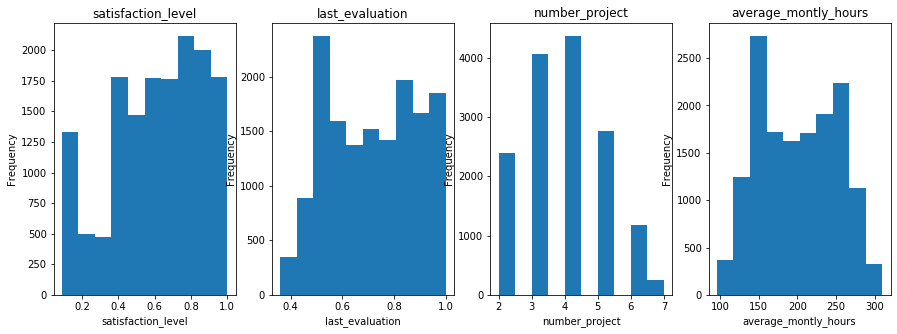

In [383]:
plt.figure(figsize=(15, 5))

for i, feature in enumerate(['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours']):
    plt.subplot(1, 4, i+1)
    df2[feature].plot(kind='hist', title=feature)
    plt.xlabel(feature)

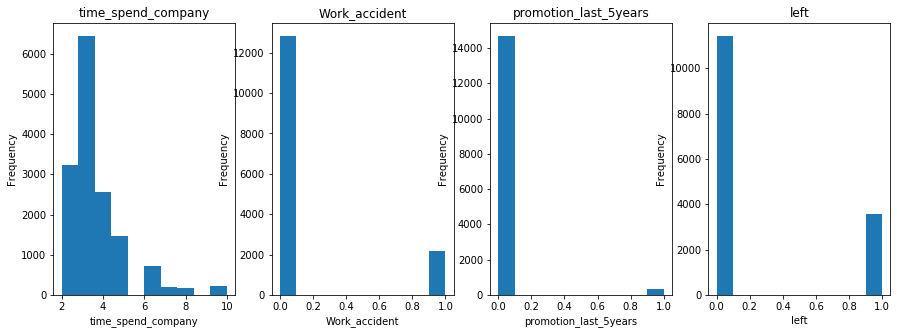

In [384]:
plt.figure(figsize=(15, 5))
for i, feature in enumerate(['time_spend_company', 'Work_accident', 'promotion_last_5years','left']):
    plt.subplot(1, 4, i+1)
    df2[feature].plot(kind='hist', title=feature)
    plt.xlabel(feature)

In [385]:
# df2['sqft_mm'] = mms.fit_transform(df2[['sqft']])
# df2['bdrms_mm'] = mms.fit_transform(df2[['bdrms']])
# df2['age_mm'] = mms.fit_transform(df2[['age']])
# df2['price_mm'] = mms.fit_transform(df2[['price']])
# df2['bdrms5'] = df2['bdrms']/5.0
# df2['age10'] = df2['age']/80.0
# df2['price100k'] = df2['price']/7e5
# 'sales', 'accounting', 'hr', 'technical', 'support', 'management', 'IT', 'product_mng', 'marketing', 'RandD'


# d = {'low':1,'medium':2,'high':3}
# df2['salary_level'] = df2['salary'].map(d)
# df2['salary_level'], cats = pd.factorize(df2['salary'])
# df2['salary_level'] = pd.Categorical(df2['salary_level'], categories=np.arange(len(cats)))
# .astype('Int64')

df2['number_project'] = df2['number_project'].astype('float64')
df2['time_spend_company'] = df2['time_spend_company'].astype('float64')
df2['Work_accident'] = df2['Work_accident'].astype('float64')
df2['left'] = df2['left'].astype('float64')
df2['promotion_last_5years'] = df2['promotion_last_5years'].astype('float64')


level_map = {'low':1.0,'medium':2.0,'high':3.0}
df2['salary_level'] = df2['salary'].map(level_map)

df2['average_montly_hours_100'] = df2['average_montly_hours']/100.0
df2['time_spend_company_10'] = df2['time_spend_company']/10.0

df2['IsSales'] = (df2['sales'] == 'sales') *1.0
df2['IsAccounting'] = (df2['sales'] == 'accounting') * 1.0
df2['IsTechnical'] = (df2['sales'] == 'technical') * 1.0
df2['IsSupport'] = (df2['sales'] == 'support') * 1.0
df2['IsManagement'] = (df2['sales'] == 'management') * 1.0
df2['IsIT'] = (df2['sales'] == 'IT') * 1.0
df2['IsProduct_mng'] = (df2['sales'] == 'product_mng') * 1.0
df2['IsMarketing'] = (df2['sales'] == 'marketing') * 1.0
df2['IsRandD'] = (df2['sales'] == 'RandD') * 1.0


df2.describe()
# df2['salary_level']
# df2['IsAccounting']
# df2.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary_level,average_montly_hours_100,time_spend_company_10,IsSales,IsAccounting,IsTechnical,IsSupport,IsManagement,IsIT,IsProduct_mng,IsMarketing,IsRandD
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268,1.594706,2.010503,0.349823,0.276018,0.051137,0.181345,0.148610,0.042003,0.081805,0.060137,0.057204,0.052470
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281,0.637183,0.499431,0.146014,0.447041,0.220284,0.385317,0.355715,0.200602,0.274077,0.237749,0.232239,0.222981
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.960000,0.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000,1.000000,1.560000,0.300000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000,2.000000,2.000000,0.300000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000,2.000000,2.450000,0.400000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000,3.000000,3.100000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [386]:
df2_dummies = pd.get_dummies(df2[['sales', 'salary']])
df2_dummies.head()

,sales_IT,sales_RandD,sales_accounting,sales_hr,sales_management,sales_marketing,sales_product_mng,sales_sales,sales_support,sales_technical,salary_high,salary_low,salary_medium
0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,1,0,0,0,0,1
2,0,0,0,0,0,0,0,1,0,0,0,0,1
3,0,0,0,0,0,0,0,1,0,0,0,1,0
4,0,0,0,0,0,0,0,1,0,0,0,1,0
5,0,0,0,0,0,0,0,1,0,0,0,1,0
6,0,0,0,0,0,0,0,1,0,0,0,1,0
7,0,0,0,0,0,0,0,1,0,0,0,1,0
8,0,0,0,0,0,0,0,1,0,0,0,1,0
9,0,0,0,0,0,0,0,1,0,0,0,1,0


In [387]:
# X = df2[[
#     'satisfaction_level',
#     'last_evaluation',
#     'number_project',
#     'average_montly_hours_100',
#     'time_spend_company_10',
#     'Work_accident',
#     'promotion_last_5years',
#     'salary_level',
#     'IsSales',
#     'IsAccounting',
#     'IsTechnical',
#     'IsSupport',
#     'IsManagement',
#     'IsIT',
#     'IsProduct_mng',
#     'IsMarketing',
#     'IsRandD'
# ]]

X = pd.concat(
    [df2[[
        'satisfaction_level',
        'last_evaluation',
        'number_project',
        'average_montly_hours_100',
        'time_spend_company_10',
        'Work_accident',
        'promotion_last_5years']],
    df2_dummies], axis=1
)

len(X.columns)
X.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours_100,time_spend_company_10,Work_accident,promotion_last_5years,sales_IT,sales_RandD,sales_accounting,sales_hr,sales_management,sales_marketing,sales_product_mng,sales_sales,sales_support,sales_technical,salary_high,salary_low,salary_medium
0,0.38,0.53,2.0,1.57,0.3,0.0,0.0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0.80,0.86,5.0,2.62,0.6,0.0,0.0,0,0,0,0,0,0,0,1,0,0,0,0,1
2,0.11,0.88,7.0,2.72,0.4,0.0,0.0,0,0,0,0,0,0,0,1,0,0,0,0,1
3,0.72,0.87,5.0,2.23,0.5,0.0,0.0,0,0,0,0,0,0,0,1,0,0,0,1,0
4,0.37,0.52,2.0,1.59,0.3,0.0,0.0,0,0,0,0,0,0,0,1,0,0,0,1,0


In [388]:
y_true = df2['left'].astype('float64')
# y_true.head()
y_true.head()

0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
Name: left, dtype: float64

In [389]:
X_train, X_test, y_train, y_test = train_test_split(X, y_true, test_size=0.2)

In [390]:
model2 = Sequential()
model2.add(Dense(1, input_shape=(len(X.columns),), activation='sigmoid'))

In [391]:
model2.compile(Adam(lr=0.5), 'binary_crossentropy', metrics=['accuracy'])

In [392]:
model2.fit(X_train.values, y_train.values, epochs=25)

Epoch 1/25
11999/11999 [==============================] - 4s 298us/step - loss: 0.5213 - acc: 0.7646
Epoch 2/25
11999/11999 [==============================] - 1s 83us/step - loss: 0.5203 - acc: 0.7666
Epoch 3/25
11999/11999 [==============================] - 1s 73us/step - loss: 0.5483 - acc: 0.7611
Epoch 4/25
11999/11999 [==============================] - 1s 67us/step - loss: 0.5295 - acc: 0.7614
Epoch 5/25
11999/11999 [==============================] - 1s 66us/step - loss: 0.5027 - acc: 0.7681
Epoch 6/25
11999/11999 [==============================] - 1s 70us/step - loss: 0.5178 - acc: 0.7668
Epoch 7/25
11999/11999 [==============================] - 1s 70us/step - loss: 0.5301 - acc: 0.7679
Epoch 8/25
11999/11999 [==============================] - 1s 66us/step - loss: 0.5305 - acc: 0.7625
Epoch 9/25
11999/11999 [==============================] - 1s 66us/step - loss: 0.5249 - acc: 0.7633
Epoch 10/25
11999/11999 [==============================] - 1s 72us/step - loss: 0.5219 - acc: 0.763

In [393]:
print("The train accuracy score is {:0.3f}".format(accuracy_score(y_train, model2.predict(X_train) > 0.5)))
print("The test accuracy score is {:0.3f}".format(accuracy_score(y_test, model2.predict(X_test) > 0.5)))

The train accuracy score is 0.756
The test accuracy score is 0.753


In [394]:
def build_binary_regression_model():
    model = Sequential()
    model.add(Dense(1, input_shape=(len(X.columns),), activation='sigmoid'))
    model.compile(Adam(lr=0.5),
                  'binary_crossentropy',
                  metrics=['accuracy'])
    return model

In [395]:
model3 = KerasClassifier(build_fn=build_binary_regression_model,
                        epochs=25,
                        verbose=0)

In [396]:
cv = KFold(5, shuffle=True)

In [397]:
scores = cross_val_score(model3, X, y_true, cv=cv)

In [398]:
scores

array([0.725     , 0.78733333, 0.76666667, 0.742     , 0.72357452])

In [399]:
print("The cross validation accuracy is {:0.4f} ± {:0.4f}".format(scores.mean(), scores.std()))

The cross validation accuracy is 0.7489 ± 0.0247


In [418]:
y_train_pred = model2.predict(X_train).ravel()
y_test_pred = model2.predict_classes(X_test)

In [414]:
def pretty_confusion_matrix(y_true, y_pred, labels=["False", "True"]):
    cm = confusion_matrix(y_true, y_pred)
    pred_labels = ['Predicted '+ l for l in labels]
    df = pd.DataFrame(cm, index=labels, columns=pred_labels)
    return df

In [415]:
pretty_confusion_matrix(y_test, y_test_pred, labels=['stay', 'leave'])

,Predicted stay,Predicted leave
stay,1714,562
leave,180,544


In [416]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

         0.0       0.90      0.75      0.82      2276
         1.0       0.49      0.75      0.59       724

    accuracy                           0.75      3000
   macro avg       0.70      0.75      0.71      3000
weighted avg       0.81      0.75      0.77      3000

